# Modeling- Part 1( Regression)

In [1]:
import os

import pandas as pd
import numpy as np

import pickle
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve, cross_val_score, RandomizedSearchCV, validation_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from bayes_opt import BayesianOptimization
import lightgbm as lgb

from sklearn.feature_selection import mutual_info_regression, SelectKBest, f_regression
from sklearn.utils import resample, shuffle
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder


from sklearn.metrics import confusion_matrix
random_state=42

In [2]:
# To suppress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [3]:
df= pd.read_csv('/Users/josephlim/Desktop/Data Science/Capstone Projects/Capstone project- Spotify/spotify_data_preprocessed_exp.csv')

In [4]:
df.shape

(587927, 12)

In [5]:
df.head()

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0.06,126903,0.645,0.4450,-13.338,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,0.00,98200,0.695,0.2630,-22.136,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,0.00,181640,0.434,0.1770,-21.180,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,0.00,176907,0.321,0.0946,-27.961,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,0.00,163080,0.402,0.1580,-16.900,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587927 entries, 0 to 587926
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        587927 non-null  float64
 1   duration_ms       587927 non-null  int64  
 2   danceability      587927 non-null  float64
 3   energy            587927 non-null  float64
 4   loudness          587927 non-null  float64
 5   speechiness       587927 non-null  float64
 6   acousticness      587927 non-null  float64
 7   instrumentalness  587927 non-null  float64
 8   liveness          587927 non-null  float64
 9   valence           587927 non-null  float64
 10  tempo             587927 non-null  float64
 11  time_signature    587927 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 53.8 MB


In [7]:
X= df.drop('popularity', axis=1)
y= df['popularity']

Let's split the data into training and testing sets.

In [8]:
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.3, random_state=42)

In [9]:
df.describe()

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,587927.000000,5.879270e+05,587927.000000,587927.000000,587927.000000,587927.000000,587927.000000,587927.000000,587927.000000,587927.000000,587927.000000,587927.000000
mean,0.276178,2.299861e+05,0.563848,0.542221,-10.197492,0.104846,0.449439,0.113214,0.213868,0.552229,118.480329,3.873574
std,0.184284,1.264124e+05,0.166122,0.251788,5.088164,0.179736,0.348759,0.266634,0.184250,0.257638,29.768571,0.472759
min,0.000000,3.344000e+03,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.130000,1.750670e+05,0.453000,0.344000,-12.881000,0.034000,0.096700,0.000000,0.098200,0.346000,95.610000,4.000000
50%,0.270000,2.148310e+05,0.578000,0.549000,-9.232000,0.044300,0.421000,0.000024,0.139000,0.564000,117.398000,4.000000
75%,0.410000,2.637600e+05,0.686000,0.748000,-6.475000,0.076500,0.784000,0.009430,0.278000,0.769000,136.351000,4.000000
max,1.000000,5.621218e+06,0.991000,1.000000,5.376000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


### Dummy Regressor

Let's explore different models we can predict popularity by. A good starting point would be to see how good the mean would be as a predictor. DummyRegressor can do just that.

In [10]:
train_mean= y_train.mean()
train_mean

0.27611495516858575

In [11]:
dumb_reg= DummyRegressor(strategy='mean')

dumb_reg.fit(X_train, y_train)
dumb_reg.score(X_test, y_test)

-1.3244392618183554e-06

It comes pretty close for now, but how good is this? We'll see how closely this explains the actual values. There are many metrics we can use to do this. We will try different metrics to choose which one works best for our specific scenario.

## Metrics

**1. Coefficient of determination ($R^{2}$):**
<br> We will make predictions by creating length of size of training set with the single value of the mean.

In [12]:
y_tr_pred_ = train_mean* np.ones(len(y_train))
y_tr_pred_[:5]

array([0.27611496, 0.27611496, 0.27611496, 0.27611496, 0.27611496])

In [13]:
y_tr_pred= dumb_reg.predict(X_train)
y_tr_pred[:5]

array([0.27611496, 0.27611496, 0.27611496, 0.27611496, 0.27611496])

They produce exactly same results. Let's find out ($R^{2}$) score.

In [14]:
r2_score(y_train, y_tr_pred)

0.0

We got $R^{2}$ score of 0 on our training set when we used mean as a predictor. $R^{2}$ explains predictions in terms of the amount of variance. Low $R^{2}$ score suggests small amount of variances explainedn. Let's try this on our test set. 

In [15]:
y_te_pred= train_mean*np.ones(len(y_test))
r2_score(y_test, y_te_pred)

-1.3244392618183554e-06

This negative number was expected, because most models perform worse on test sets than on training sets.

**2.Mean Absolute Error (MAE)**
<br>
MAE tells us how much we expect to be off by if we guessed based on the average of known values.

In [16]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(0.15318341959027598, 0.15257615987954135)

MAE on testing set is very slightly worse than on training data, but they are very similar.

**3.Mean Squared Error (MSE)**
<br>Mean squared error is the average of square of errors.

In [17]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(0.03401041691637179, 0.033844447707936466)

While it was pretty obvious from $R^{2}$ score that a simple average would not be the best model, it was worth double (or triple) checking it using different metrics. 

## Initial Models:

Let's build pipelines to simplify processes. 

In [18]:
pipe = make_pipeline(
    StandardScaler(),
    LinearRegression()
)

In [19]:
type(pipe)

sklearn.pipeline.Pipeline

In [20]:
hasattr(pipe, 'fit'), hasattr(pipe, 'predict')

(True, True)

Let's try fitting, making predictions, and evaluating performance using this pipeline.

In [21]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [22]:
y_tr_pred= pipe.predict(X_train)
y_te_pred= pipe.predict(X_test)

In [23]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.21113865967866263, 0.21027408674980674)

Given the number of features, it is possible that I am overfitting. As such, I will limit number of features that get used based on f_regression.

In [24]:
pipe = make_pipeline(
    StandardScaler(),
    SelectKBest(f_regression),
    LinearRegression()
)

In [25]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(score_func=<function f_regression at 0x7fc407b93700>)),
                ('linearregression', LinearRegression())])

In [26]:
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

In [27]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.1874317014221989, 0.18692349989156398)

In [28]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(0.1354012030093336, 0.1349603370141544)

We see that our model performance got much worse than when we didn't limit features. This was an expected result of limiting feature numbers. Let's try to include more.

In [29]:
pipe10 = make_pipeline(
    StandardScaler(),
    SelectKBest(f_regression, k=10),
    LinearRegression()
)

In [30]:
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

In [31]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.1874317014221989, 0.18692349989156398)

In [32]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(0.1354012030093336, 0.1349603370141544)

It didn't make too much of a difference. Let's try to use cross-validation to assess model performance.

In [33]:
cv_results= cross_validate(pipe10, X_train, y_train, cv=5)

In [34]:
cv_scores= cv_results['test_score']
cv_scores

array([0.18769585, 0.18979437, 0.18802968, 0.18372459, 0.18766839])

In [35]:
np.mean(cv_scores), np.std(cv_scores)

(0.18738257791371474, 0.001989783250989196)

We can estimate the variability, or uncertainty of model performance.

In [36]:
np.round((np.mean(cv_scores) - 2 * np.std(cv_scores), np.mean(cv_scores) + 2 * np.std(cv_scores)), 2)

array([0.18, 0.19])

## Regression Models

### GridSearchCV - Linear Regression

In [37]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'selectkbest', 'linearregression', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'selectkbest__k', 'selectkbest__score_func', 'linearregression__copy_X', 'linearregression__fit_intercept', 'linearregression__n_jobs', 'linearregression__normalize', 'linearregression__positive'])

In [38]:
k = [k+1 for k in range(len(X_train.columns))]
grid_params = {'selectkbest__k': k}

In [39]:
lr_grid_cv = GridSearchCV(pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [40]:
lr_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x7fc407b93700>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]})

In [41]:
score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]


In [42]:
lr_grid_cv.best_params_

{'selectkbest__k': 11}

Text(0.5, 1.0, 'Pipeline mean CV score (error bars +/- 1sd)')

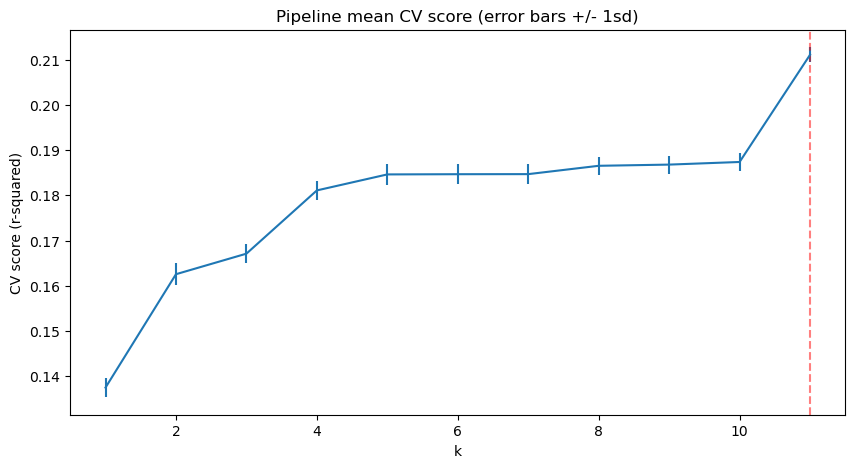

In [43]:
best_k = lr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)')

In [44]:
selected = lr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()

In [45]:
coefs= lr_grid_cv.best_estimator_.named_steps.linearregression.coef_
features= X_train.columns[selected]
pd.Series(coefs, index= features).sort_values(ascending= False)

danceability        0.030250
loudness            0.025942
energy              0.005897
tempo               0.002682
duration_ms         0.000726
time_signature      0.000333
speechiness        -0.006080
liveness           -0.007173
instrumentalness   -0.025357
valence            -0.036873
acousticness       -0.043773
dtype: float64

We see that the most positive feature were instrumentalness. This differs from our EDA, which showed preference to non-instrumentalness. Let's try a different model.

### Random Forest Model

In [46]:
RF= RandomForestRegressor(random_state= 42)

In [47]:
rf_default_cv_results= cross_validate(RF, X_train, y_train, cv=5)

In [48]:
rf_cv_scores= rf_default_cv_results['test_score']
rf_cv_scores

array([0.37365652, 0.37579395, 0.37136518, 0.37063597, 0.3656819 ])

In [49]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(0.3714267059458399, 0.0033963725624629997)

Random Forest Regression model looks much more promising. Let's see what hyperparameter tuning can do for this model.

#### Random Forest Model- Bayesian Optimization

In [50]:
cv_results.keys()

dict_keys(['fit_time', 'score_time', 'test_score'])

In [51]:
X_train.shape

(411548, 11)

In [52]:
y_train.shape

(411548,)

In [53]:
def fit_model(n_estimators, min_samples_split, max_depth):
    n_estimators=round(n_estimators)
    max_depth= round(max_depth)
    min_samples_split= round(min_samples_split)
    
    regressor= RandomForestRegressor(n_estimators= n_estimators, 
                                 max_depth=max_depth,
                                 min_samples_split= min_samples_split, 
                                 random_state=random_state)

    return np.mean(cross_validate(regressor, X_train, y_train, scoring='r2', cv=5, return_train_score=True)['test_score'])


In [54]:
rf_BO = BayesianOptimization(fit_model,{
        "n_estimators":(300, 2000), 
        "min_samples_split":(20,100), 
        "max_depth":(3,7) 
    })

rf_BO.maximize(n_iter=10, init_points=2)

|   iter    |  target   | max_depth | min_sa... | n_esti... |
-------------------------------------------------------------
| 1         | 0.2218    | 3.436     | 28.6      | 815.4     |
| 2         | 0.2948    | 6.948     | 42.42     | 1.153e+03 |
| 3         | 0.2218    | 3.02      | 41.74     | 1.15e+03  |
| 4         | 0.2417    | 3.611     | 85.24     | 1.482e+03 |
| 5         | 0.2801    | 6.495     | 69.35     | 1.372e+03 |
| 6         | 0.2627    | 5.225     | 38.71     | 1.772e+03 |
| 7         | 0.2627    | 5.199     | 93.46     | 1.911e+03 |
| 8         | 0.2417    | 4.253     | 78.26     | 914.2     |
| 9         | 0.28      | 5.849     | 73.35     | 1.609e+03 |
| 10        | 0.2628    | 4.698     | 46.65     | 1.442e+03 |
| 11        | 0.2218    | 3.237     | 34.64     | 1.828e+03 |
| 12        | 0.28      | 5.84      | 65.25     | 1.596e+03 |


### Gradient Boosting Model
The performance of Random Forest Model wasn't as good as I hoped. Let's try a gradient boosting model.

#### Gradient Boosting Model- Bayesian Optimization

In [55]:
def lgb_eval(num_leaves, max_depth, min_child_samples):
    num_leaves= round(num_leaves)
    max_depth= round(max_depth)
    min_child_samples= round(min_child_samples)
    
    regressor= lgb.LGBMRegressor(num_leaves= num_leaves, 
                                 max_depth=max_depth,
                                 min_child_samples= min_child_samples, 
                                 random_state=42)
    
    return np.mean(cross_validate(regressor, X_train, y_train, scoring='r2', cv=5, error_score= 'raise')['test_score'])

In [56]:
lgbBO = BayesianOptimization(lgb_eval, {'num_leaves': (25, 4000),
                                                'max_depth': (5, 63),
                                                'min_child_samples': (50, 10000)
                                                })


lgbBO.maximize(n_iter=10, init_points=2)

|   iter    |  target   | max_depth | min_ch... | num_le... |
-------------------------------------------------------------
| 1         | 0.3372    | 37.33     | 4.926e+03 | 1.598e+03 |
| 2         | 0.3389    | 35.94     | 4.241e+03 | 1.864e+03 |
| 3         | 0.3612    | 40.63     | 450.9     | 966.0     |
| 4         | 0.3593    | 51.06     | 53.12     | 3.872e+03 |
| 5         | 0.3262    | 60.67     | 9.992e+03 | 3.923e+03 |
| 6         | 0.3173    | 5.418     | 8.715e+03 | 1.457e+03 |
| 7         | 0.3465    | 48.03     | 96.43     | 56.13     |
| 8         | 0.3274    | 34.69     | 9.198e+03 | 3.375e+03 |
| 9         | 0.3607    | 41.08     | 466.2     | 962.5     |
| 10        | 0.3345    | 23.08     | 5.906e+03 | 318.1     |
| 11        | 0.3659    | 38.72     | 52.02     | 1.935e+03 |
| 12        | 0.3391    | 7.064     | 1.583e+03 | 3.748e+03 |


In [57]:
print(lgbBO.max)

{'target': 0.36591806044434155, 'params': {'max_depth': 38.721448876371795, 'min_child_samples': 52.01773912902063, 'num_leaves': 1934.7050062346498}}


Our prediction actually worsened. For now, our best bet is Random Forest regression model. However, I'm still not too excited about our current model performance. Perhaps we should try our hands at classification models.